# 演習課題2回目

10月27日(金)

## セットアップ

In [72]:
# Pythonが実行時のバージョンを満たしているか確認する
import sys
assert sys.version_info >= (3, 9, 7)

# 必要なモジュールのインポート
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

# サードパーティ製ライブラリが実行時のバージョンを満たしているか確認する
assert pd.__version__ >= '1.3'
assert sklearn.__version__ >= '0.24'

# データの保存場所の定義
DATA_ROOT_PATH = Path('data', '4')

# グラフのスタイル
plt.style.use('seaborn')

## データの取得

In [73]:
from sklearn.datasets import load_wine

# CSVファイルパスの定義
WINE_PATH = DATA_ROOT_PATH / 'wine.csv'

if WINE_PATH.exists():
    wine = pd.read_csv(WINE_PATH)
    X = wine.iloc[:, :-1]
    y = wine.iloc[:, -1]
else:
    # 実行時にファイルが存在しなかった場合，scikit-learnの関数から読み込む
    wine = load_wine(as_frame=True)
    X = wine.data
    y = wine.target

## ヒストグラムの表示

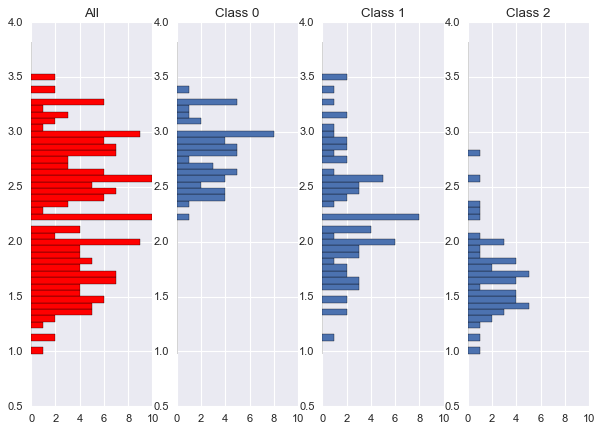

In [74]:
# データの定義
phenols_all = X['total_phenols']
phenols_0 = phenols_all[y == 0]
phenols_1 = phenols_all[y == 1]
phenols_2 = phenols_all[y == 2]

bins_common = np.arange(
    phenols_all.min(),
    phenols_all.max(),
    (phenols_all.max() - phenols_all.min()) / 50.0
)

fig, axs = plt.subplots(1, 4, figsize=(9, 6))

# 全体のヒストグラム
axs[0].hist(phenols_all, bins=bins_common, orientation='horizontal', color='r')
axs[0].set_title('All')
xlim_min, xlim_max = axs[0].get_xlim()
ylim_min, ylim_max = axs[0].get_ylim()

# 各クラスのヒストグラムを作成するための関数を作成
def plot_hist_wine(ax, data: pd.Series, title: str):
    ax.hist(data, bins=bins_common, orientation='horizontal')
    ax.set_title(title)
    ax.set_xlim(xlim_min, xlim_max)
    ax.set_ylim(ylim_min, ylim_max)

# 各クラスのヒストグラムをプロット
plot_hist_wine(axs[1], phenols_0, 'Class 0')
plot_hist_wine(axs[2], phenols_1, 'Class 1')
plot_hist_wine(axs[3], phenols_2, 'Class 2')

plt.show()